### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR,SVR
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
audit = pd.read_csv('audit_risk.csv')
audit.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [3]:
trial = pd.read_csv('trial.csv')
trial.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [4]:
audit['Money_Value'].fillna(0, inplace = True)
trial['Money_Value'].fillna(0, inplace = True)

In [5]:
print("Audit \n", audit.isnull().sum())
print("Trial \n",trial.isnull().sum())

Audit 
 Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64
Trial 
 Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64


In [6]:
audit_risk = pd.merge(audit,trial, left_index=True, right_index=True,how = 'inner',suffixes=('', ' '))

In [7]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 45 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       776 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [8]:
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[:, y]
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                
    return list(duplicateColumnNames)

In [9]:
duplicateColumnNames = getDuplicateColumns(audit_risk)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows
Column name :  LOCATION_ID 
Column name :  District
Column name :  History 
Column name :  Score 
Column name :  numbers 
Column name :  PARA_A 
Column name :  Money_Value 
Column name :  TOTAL 
Column name :  PARA_B 
Column name :  Sector_score 


In [10]:
audit_risk = audit_risk.drop(columns=getDuplicateColumns(audit_risk))
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 35 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       776 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

Converting and imputing values for ``LOCATION_ID`` 

In [11]:
audit_risk['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [12]:
audit_risk.LOCATION_ID.replace(['LOHARU', 'NUH', 'SAFIDON'], ['45', '46', '47'], inplace=True)

In [13]:
audit_risk['LOCATION_ID'] = audit_risk['LOCATION_ID'].astype(np.int64)
audit_risk[:10][['Score_A', 'Score_B', 'SCORE_A', 'SCORE_B']]

,Score_A,Score_B,SCORE_A,SCORE_B
0,0.6,0.2,6,2
1,0.2,0.2,2,2
2,0.2,0.2,2,2
3,0.2,0.6,2,6
4,0.2,0.2,2,2
5,0.2,0.2,2,2
6,0.4,0.4,4,4
7,0.6,0.6,6,6
8,0.6,0.6,6,6
9,0.6,0.2,6,2


As Columns ``Score_A, Score_B`` and ``SCORE_A, SCORE_B`` are similar and related as ``SCORE_* = 10 * Score_*`` So we can drop both ``SCORE_A`` and ``SCORE_B`` columns 

In [14]:
audit_risk = audit_risk.drop(['SCORE_A', 'SCORE_B'], axis = 1)
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 33 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null int64
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       776 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CONT

### Exploratory Data Analysis 

Findging the Risk Distribution in the data on ``Risk`` column as it is one of the target variable

Text(0.5, 1.0, ' Risk of Fraud Ditribution \n (0: Not Risky Firm || 1: Risky Firm)')

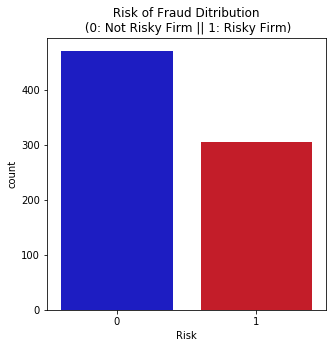

In [15]:
colors = ["#0101DE", "#DF0111"]
fig1 = plt.subplots(figsize = (5,5))
sns.countplot('Risk', data=audit_risk, palette=colors)
plt.title(' Risk of Fraud Ditribution \n (0: Not Risky Firm || 1: Risky Firm)', fontsize=12)

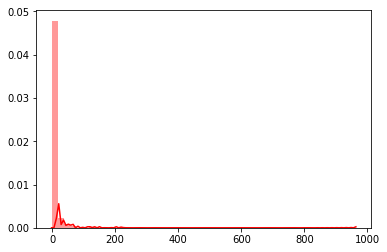

In [16]:
# Checking the Distribution of the Audit_risk as it is one of the target variable
audit_risk_value = audit_risk['Audit_Risk'].values
sns.distplot(audit_risk_value, color='r')

Finding Correlation between the variables of the dataset 

In [17]:
sp_corr = audit_risk.corr(method= 'spearman')
pearson_corr = audit_risk.corr(method= 'pearson')

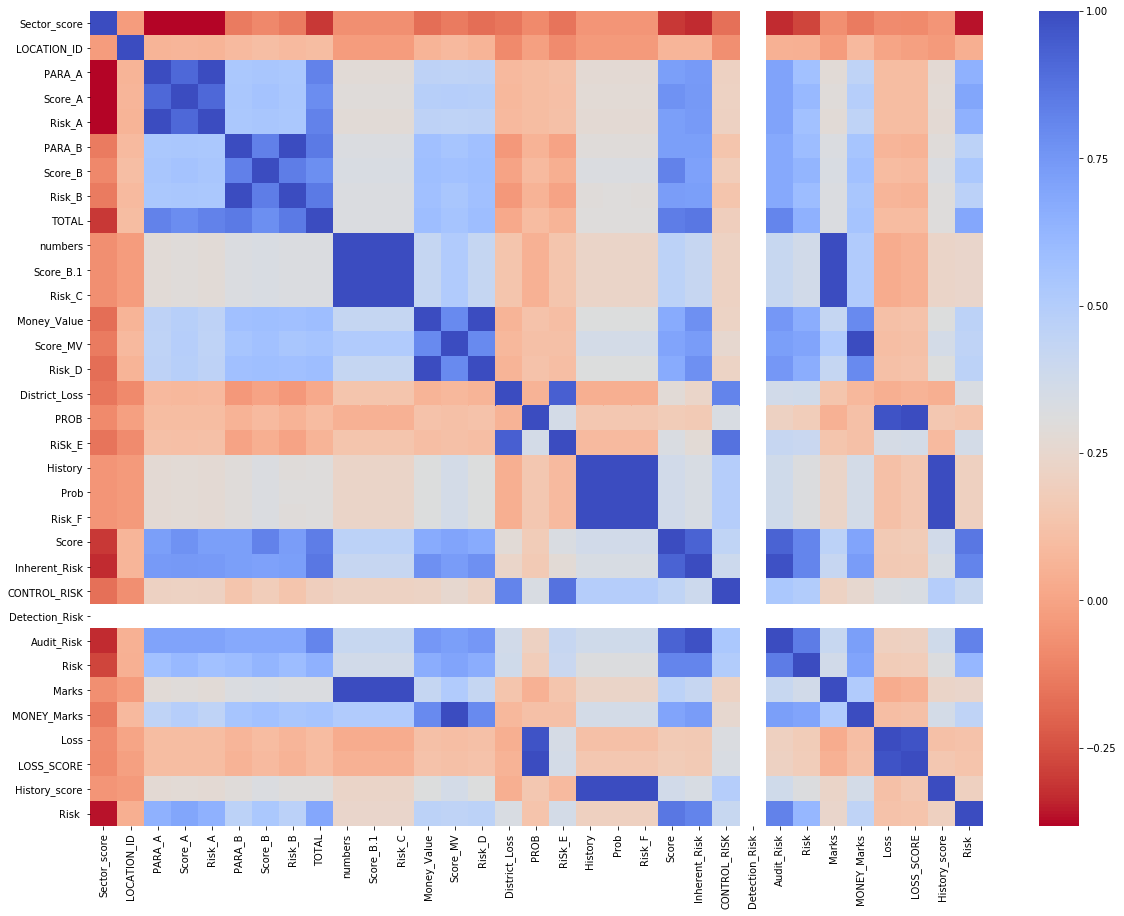

In [18]:
fig = plt.subplots(figsize = (20,15))
sns.heatmap(sp_corr, cmap='coolwarm_r', annot_kws={'size':20})

In [19]:
indices = np.where((pearson_corr >= 0.999) | (pearson_corr <= -0.999))
indices = [(pearson_corr.index[x], pearson_corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]

In [20]:
indices

[('PARA_A', 'Risk_A'),
 ('PARA_B', 'Risk_B'),
 ('Score_B.1', 'Marks'),
 ('Money_Value', 'Risk_D'),
 ('Score_MV', 'MONEY_Marks'),
 ('PROB', 'LOSS_SCORE'),
 ('Prob', 'History_score')]

### Feature Scaling
- Standard 
As we see most of the features are not skewed and displays bimodal tranfromation so the ``Standard scaling`` will be appropriate for this type of data 

In [21]:
y_org = audit_risk['Audit_Risk']
X_org = audit_risk.drop(columns=['Audit_Risk','Risk'])

In [22]:
y_org.head()

0    1.7148
1    0.5108
2    0.3096
3    3.5060
4    0.2832
Name: Audit_Risk, dtype: float64

In [23]:
X_train_org, X_test_org , y_train, y_test  = train_test_split(X_org, y_org, random_state = 0)

In [24]:
scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [25]:
X_train.shape

(582, 31)

In [26]:
y_train.shape

(582,)

### 2 Models with Bagging 
- KNN Regressor
- Decision Tree Regressor

In [27]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

knn = KNeighborsRegressor(n_neighbors = 5)
bagging_knn = BaggingRegressor(knn, n_estimators = 1000, max_samples = 582, max_features = 31, bootstrap = True,random_state=0)
bagging_knn.fit(X_train,y_train)

train_MSE = mean_squared_error(y_train, bagging_knn.predict(X_train))
test_MSE = mean_squared_error(y_test, bagging_knn.predict(X_test))
print('Train score: {:.2f}'.format(bagging_knn.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bagging_knn.score(X_test, y_test)))


Train score: 0.78
Test score: 0.14


In [28]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10,random_state=0)
bagging_dt = BaggingRegressor(dt, n_estimators = 1000, max_samples = 582, max_features = 31, bootstrap = True, random_state=0)
bagging_dt.fit(X_train, y_train)

train_MSE = mean_squared_error(y_train, bagging_dt.predict(X_train))
test_MSE = mean_squared_error(y_test, bagging_dt.predict(X_test))
print('Train score: {:.2f}'.format(bagging_dt.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bagging_dt.score(X_test, y_test)))

Train score: 0.98
Test score: 0.18


## Two Models with Pasting 
- KNN Regressor
- Linear Regression
- Linear SVM

In [29]:
knn_pasting_mod = KNeighborsRegressor(n_neighbors = 5)
knn_pasting = BaggingRegressor(knn_pasting_mod, n_estimators = 1000, max_samples = 582, max_features = 31, bootstrap = False,random_state=0)
knn_pasting.fit(X_train,y_train)

train_MSE_pasting = mean_squared_error(y_train, knn_pasting.predict(X_train))
test_MSE_pasting = mean_squared_error(y_test, knn_pasting.predict(X_test))
print('Train score: {:.2f}'.format(knn_pasting.score(X_train, y_train)))
print('Test score: {:.2f}'.format(knn_pasting.score(X_test, y_test)))


Train score: 0.79
Test score: 0.15


In [30]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()
linearReg_pasting = BaggingRegressor(linearReg, n_estimators = 1000, max_samples = 582, max_features = 31, bootstrap = False,random_state=0)
linearReg_pasting.fit(X_train,y_train)

train_MSE_lr_pasting = mean_squared_error(y_train, linearReg_pasting.predict(X_train))
test_MSE_lr_pasting = mean_squared_error(y_test, linearReg_pasting.predict(X_test))
print('Train score: {:.2f}'.format(linearReg_pasting.score(X_train, y_train)))
print('Test score: {:.2f}'.format(linearReg_pasting.score(X_test, y_test)))


Train score: 0.93
Test score: 0.49


In [31]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import LinearSVR
model_svm = LinearSVR(C = 1000, random_state=0)
from sklearn.metrics import r2_score

pasting_svm = BaggingRegressor(model_svm, n_estimators = 100, max_samples = 582, max_features = 31, bootstrap = False)
pasting_svm.fit(X_train,y_train)

train_MSE = mean_squared_error(y_train, pasting_svm.predict(X_train))
test_MSE = mean_squared_error(y_test, pasting_svm.predict(X_test))
print('Train score: {:.2f}'.format(pasting_svm.score(X_train, y_train)))
print('Test score: {:.2f}'.format(pasting_svm.score(X_test, y_test)))

Train score: 0.90
Test score: 0.46


## Two models with adaboost boosting
- Decision Tree Regressor 
- Linear Regression

In [32]:
from sklearn.ensemble import AdaBoostRegressor
dtree = DecisionTreeRegressor(max_depth= 10)

dtree_adaboost = AdaBoostRegressor(dtree, n_estimators=100, loss='linear', learning_rate=0.05, random_state=0)
dtree_adaboost.fit(X_train, y_train)

train_MSE = mean_squared_error(y_train, dtree_adaboost.predict(X_train))
test_MSE = mean_squared_error(y_test, dtree_adaboost.predict(X_test))
print('Train score: {:.2f}'.format(dtree_adaboost.score(X_train, y_train)))
print('Test score: {:.2f}'.format(dtree_adaboost.score(X_test, y_test)))

Train score: 1.00
Test score: 0.15


In [33]:
model_lreg = LinearRegression()

adaboost_lreg = AdaBoostRegressor(linearReg,n_estimators=100, loss='linear', learning_rate=0.05, random_state=0)
adaboost_lreg.fit(X_train, y_train)

train_MSE = mean_squared_error(y_train, adaboost_lreg.predict(X_train))
test_MSE = mean_squared_error(y_test, adaboost_lreg.predict(X_test))
print('Train score: {:.2f}'.format(adaboost_lreg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(adaboost_lreg.score(X_test, y_test)))

Train score: 0.92
Test score: 0.43


### Gradient Boosting

In [34]:
from  sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=1, n_estimators=200, learning_rate=0.05, random_state=0)
gbrt.fit(X_train, y_train)

train_MSE = mean_squared_error(y_train, gbrt.predict(X_train))
test_MSE = mean_squared_error(y_test, gbrt.predict(X_test))
print('Train score: {:.2f}'.format(gbrt.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gbrt.score(X_test, y_test)))

Train score: 0.94
Test score: 0.21


## PCA

In [35]:
X_scaled = scaler.transform(X_org)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

11

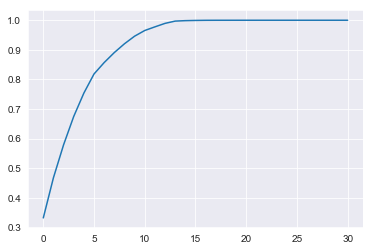

In [37]:
sns.set_style("darkgrid")
plt.plot(cumsum)
plt.show()

In [38]:
pca = PCA(n_components = 11)
X_redu = pca.fit_transform(X_org)

In [39]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_redu,y_org,random_state=0)

In [40]:
print(X_train_pca.shape)
print(y_train_pca.shape)

(582, 11)
(582,)


In [41]:
model_Scores = []
def printGridResult (model_def) :
    print("Best CV result: {}".format(model_def.best_score_))
    print("Best parameters: {}".format(model_def.best_params_))
    print("Training Score: {}".format(model_def.score(X_train_pca, y_train_pca)))
    print("Testing Score: {}".format(model_def.score(X_test_pca, y_test_pca)))

## Regression Tasks with PCA
- Linear Regression

In [42]:
lreg = LinearRegression()
cvscores = cross_val_score(lreg, X_train_pca, X_train_pca, cv=3)
print("Cross validation scores: {}".format(cvscores))
print("Train Score {:.2f}".format(cvscores.mean()))
lreg.fit(X_train_pca, X_train_pca)
test_score = lreg.score(X_train_pca,X_train_pca) 
print("Test Score {:.2f}".format(test_score))

Cross validation scores: [1. 1. 1.]
Train Score 1.00
Test Score 1.00


In [43]:
model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'Linear Regression',
                    'Parameters' : '-',
                    'Training_score': cvscores.mean(),
                    'Test Score':test_score})

In [44]:
from sklearn.linear_model import SGDRegressor, Ridge, Lasso


 - Stocastic Gradiant Descent Regressor( SGD Regressor)

In [45]:
## As SGD has Parameters using GridSearchCV

sgd_param = {'max_iter': [10, 100, 1000],'learning_rate':['optimal'], 'penalty' :['l1','l2'],'random_state':[0]}

print("Parameter grid for GridSearch CV :\n{}".format(sgd_param))

sgd_GSCV =  GridSearchCV(estimator = SGDRegressor(), 
                         param_grid= sgd_param, cv = 3, n_jobs=1, return_train_score = True)
sgd_GSCV.fit(X_train_pca,y_train_pca)

Parameter grid for GridSearch CV :
{'max_iter': [10, 100, 1000], 'learning_rate': ['optimal'], 'penalty': ['l1', 'l2'], 'random_state': [0]}


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'max_iter': [10, 100, 1000], 'learning_rate': ['optimal'], 'penalty': ['l1', 'l2'], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [46]:
printGridResult(sgd_GSCV)
model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'SGD Regressor',
                    'Parameters' : sgd_GSCV.best_params_,
                    'Training_score': sgd_GSCV.score(X_train_pca, y_train_pca),
                    'Test Score':sgd_GSCV.score(X_test_pca, y_test_pca)})

Best CV result: -3.1640522420982445e+25
Best parameters: {'learning_rate': 'optimal', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 0}
Training Score: -4.066655772632314e+26
Testing Score: -5.732902641634374e+25


- Polynomial Regression PCA

Train Scores [0.7772666806696308, -1.5094280730227112, -75.47257991635328, -961635.7624874116, -2288166546.6611266]
Test Scores [0.3744167686382065, 0.1631060578019471, -228.29961688677835, -144121.2648754315, -30588088398.292]


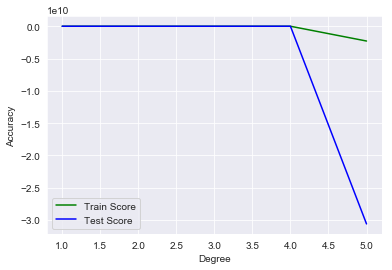

In [47]:
polyreg = LinearRegression()
poly_train_pca_score = []
poly_test_score = []

for n in range(1,6):
    poly = PolynomialFeatures(n)
    X_train_pca_poly = poly.fit_transform(X_train_pca)
    X_test_poly = poly.transform(X_test_pca)
    scores_train = cross_val_score(polyreg, X_train_pca_poly, y_train_pca, cv=3)
    polyreg.fit(X_train_pca_poly,y_train_pca)
    scores_test = polyreg.score(X_test_poly,y_test)
    poly_test_score.append(scores_test)
    poly_train_pca_score.append(scores_train.mean())

print("Train Scores", poly_train_pca_score)
print("Test Scores", poly_test_score)

%matplotlib inline
x_axis = range(1,6)
plt.plot(x_axis, poly_train_pca_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, poly_test_score, c = 'b', label = 'Test Score')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'Polynomial Regression PCA',
                    'Parameters' : {'Degree':0},
                    'Training_score':poly_train_pca_score[0],
                    'Test Score':poly_test_score[0]})

- Ridge Regerssion

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}


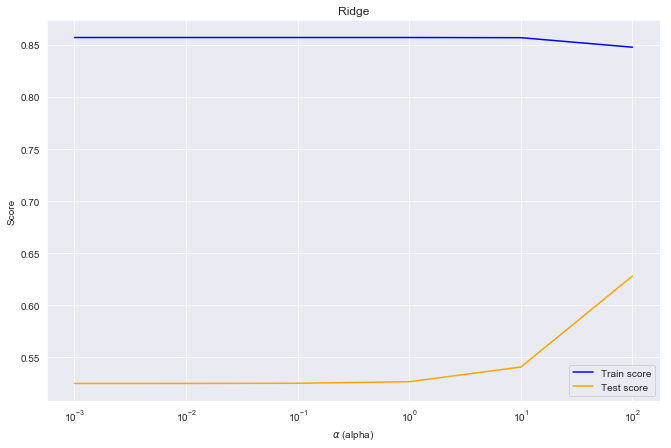

Best CV result: 0.6281543737137948
Best parameters: {'alpha': 100}
Training Score: 0.8454730350188855
Testing Score: 0.38061246069987764


In [49]:
ridgeParamGSV = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(ridgeParamGSV))

ridgeGridSV = GridSearchCV(estimator = Ridge(random_state = 0 ),param_grid = ridgeParamGSV, 
                           cv=5, return_train_score=True, scoring='r2', n_jobs=1)
ridgeGridSV.fit(X_train_pca, y_train_pca)

ridge_train_scores_mean = ridgeGridSV.cv_results_["mean_train_score"]
ridge_test_scores_mean = ridgeGridSV.cv_results_["mean_test_score"]
plt.figure(figsize = (11,7))
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx([0.001, 0.01, 0.1, 1, 10, 100], ridge_train_scores_mean, label='Train score',
             color='blue')
plt.semilogx([0.001, 0.01, 0.1, 1, 10, 100], ridge_test_scores_mean,
             label='Test score', color='orange')

plt.title('Ridge')
plt.legend(loc='best')
plt.show()

model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'Ridge Regression',
                    'Parameters' : ridgeGridSV.best_params_,
                    'Training_score': ridgeGridSV.score(X_train_pca, y_train_pca),
                    'Test Score': ridgeGridSV.score(X_test_pca, y_test_pca )})
printGridResult(ridgeGridSV)

- Lasso Regression

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
Best CV result: 0.5972082996323421
Best parameters: {'alpha': 1}
Training Score: 0.8178980620471861
Testing Score: 0.3735311409270091


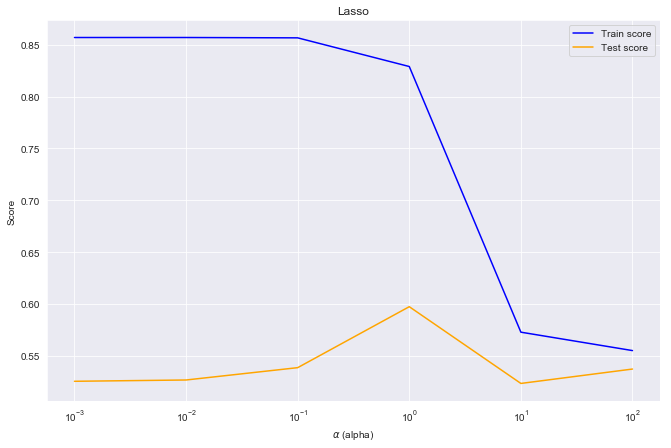

In [50]:
lassoParamGSV = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(lassoParamGSV))

lassoGridSV = GridSearchCV(estimator = Lasso(random_state = 0 ),param_grid = lassoParamGSV, 
                           cv=5, return_train_score=True, scoring='r2', n_jobs=1)
lassoGridSV.fit(X_train_pca, y_train_pca)

lasso_train_scores_mean = lassoGridSV.cv_results_["mean_train_score"]
lasso_test_scores_mean = lassoGridSV.cv_results_["mean_test_score"]
plt.figure(figsize = (11,7))
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx([0.001, 0.01, 0.1, 1, 10, 100], lasso_train_scores_mean, label='Train score',
             color='blue')
plt.semilogx([0.001, 0.01, 0.1, 1, 10, 100], lasso_test_scores_mean,
             label='Test score', color='orange')

plt.title('Lasso')
plt.legend(loc='best')

model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'Lasso Regression',
                    'Parameters' : lassoGridSV.best_params_,
                    'Training_score': lassoGridSV.score(X_train_pca, y_train_pca),
                    'Test Score': lassoGridSV.score(X_test_pca, y_test_pca )})
printGridResult(lassoGridSV)

- KNN Regressor with PCA

Parameter grid:
{'n_neighbors': [1, 5, 10, 15, 20]}


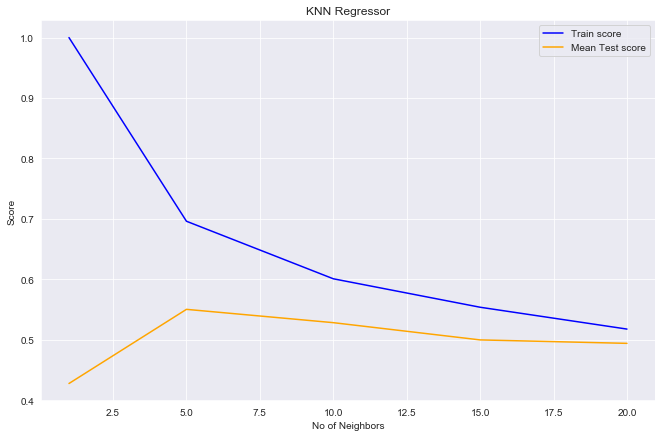

Best CV result: 0.5503094499438319
Best parameters: {'n_neighbors': 5}
Training Score: 0.7177136389964166
Testing Score: 0.08810582770148112


In [51]:
knnRegressor = KNeighborsRegressor()
noofNeighbors = {'n_neighbors':[1, 5, 10, 15, 20]}
print("Parameter grid:\n{}".format(noofNeighbors))
knnGridSCV = GridSearchCV(knnRegressor, param_grid = noofNeighbors, cv=5, return_train_score=True)
knnGridSCV.fit(X_train_pca, y_train_pca)

n_neighbors = [1, 5, 10, 15, 20]

n_neighbors = [1, 5, 10, 15, 20]

train_knnRegressor = knnGridSCV.cv_results_["mean_train_score"]

test_knnRegressor = knnGridSCV.cv_results_["mean_test_score"]


plt.figure(figsize = (11,7))
plt.title('KNN Regressor')
plt.xlabel('No of Neighbors')
plt.ylabel('Score')
plt.plot(n_neighbors, train_knnRegressor, label='Train score',
             color='blue')
plt.plot(n_neighbors, test_knnRegressor,
             label='Mean Test score', color='orange')

plt.legend(loc='best')
plt.show()

printGridResult(knnGridSCV)

model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'KNN Regressor',
                    'Parameters' : knnGridSCV.best_params_,
                    'Training_score': knnGridSCV.score(X_train_pca, y_train_pca),
                    'Test Score': knnGridSCV.score(X_test_pca, y_test_pca )})

- Linear SVM

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


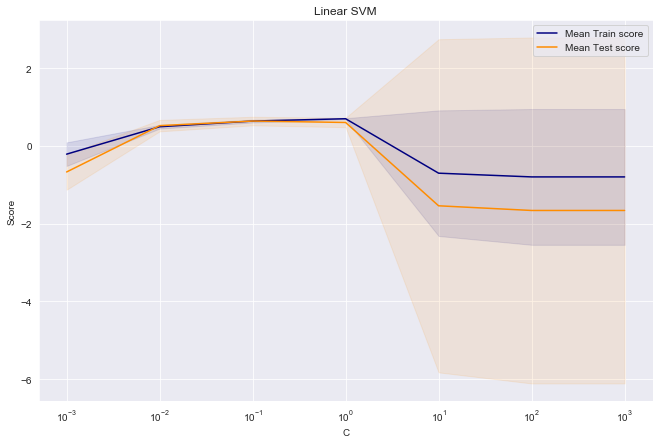

In [52]:
linearSVM = LinearSVR(random_state=0)
linearSVMparam = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print("Parameter grid:\n{}".format(linearSVMparam))
linearSVMGridSV = GridSearchCV(linearSVM, param_grid = linearSVMparam, cv=5, return_train_score=True)
linearSVMGridSV.fit(X_train_pca, y_train_pca)

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
linearSVM_train_mean = linearSVMGridSV.cv_results_["mean_train_score"]
linearSVM_train_std = linearSVMGridSV.cv_results_["std_train_score"]
linearSVM_test_mean = linearSVMGridSV.cv_results_["mean_test_score"]
linearSVM_test_std = linearSVMGridSV.cv_results_["std_test_score"]

plt.figure(figsize = (11,7))
plt.title('Linear SVM')
plt.xlabel('C')
plt.ylabel('Score')
# plot train scores
plt.semilogx(C, linearSVM_train_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(C,
                       linearSVM_train_mean - linearSVM_train_std,
                       linearSVM_train_mean + linearSVM_train_std,
                       alpha = 0.1,
                       color='navy')
plt.semilogx(C, linearSVM_test_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(C,
                       linearSVM_test_mean - linearSVM_test_std,
                       linearSVM_test_mean + linearSVM_test_std,
                       alpha = 0.1,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

In [53]:
printGridResult(linearSVMGridSV)

model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'Linear SVM',
                    'Parameters' : linearSVMGridSV.best_params_,
                    'Training_score': linearSVMGridSV.score(X_train_pca, y_train_pca),
                    'Test Score': linearSVMGridSV.score(X_test_pca, y_test_pca)})

Best CV result: 0.6389666536809903
Best parameters: {'C': 0.1}
Training Score: 0.6492268556231441
Testing Score: 0.34060803277757723


- SVM with Radial Kernal

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


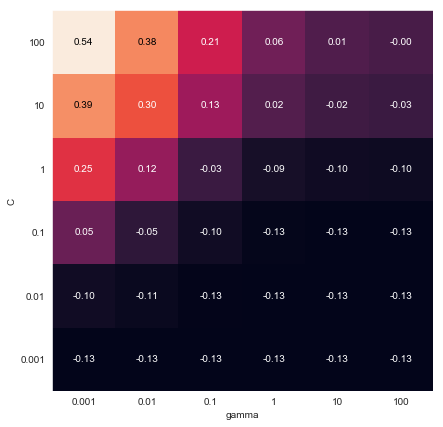

Best CV result: 0.5444275297320654
Best parameters: {'C': 100, 'gamma': 0.001}
Training Score: 0.9638971716748381
Testing Score: 0.06687840704246029


In [54]:
import mglearn
svmRadial = SVR(kernel = 'rbf')
param_Radial_SVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_Radial_SVM))
svmRadialGridSV  = GridSearchCV(svmRadial, param_grid = param_Radial_SVM, cv=5, return_train_score=True)

svmRadialGridSV.fit(X_train_pca, y_train_pca)

svmRadialGridSV_results = pd.DataFrame(svmRadialGridSV.cv_results_)
%matplotlib inline
scores = np.array(svmRadialGridSV_results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
plt.figure(figsize = (11,7))
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_Radial_SVM['gamma'], ylabel='C', yticklabels=param_Radial_SVM['C'])
plt.figure
plt.show()
printGridResult(svmRadialGridSV)
model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'SVM Radial',
                    'Parameters' : svmRadialGridSV.best_params_,
                    'Training_score': svmRadialGridSV.score(X_train_pca, y_train_pca),
                    'Test Score': svmRadialGridSV.score(X_test_pca, y_test_pca )})

- Polynomial kernal SVM

In [55]:
polySVM = SVR(kernel = 'poly', degree = 1)
paramPolySVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(paramPolySVM))
polySVMGridSV = GridSearchCV(polySVM, param_grid = paramPolySVM, cv=5, return_train_score= True)

polySVMGridSV.fit(X_train_pca, y_train_pca)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

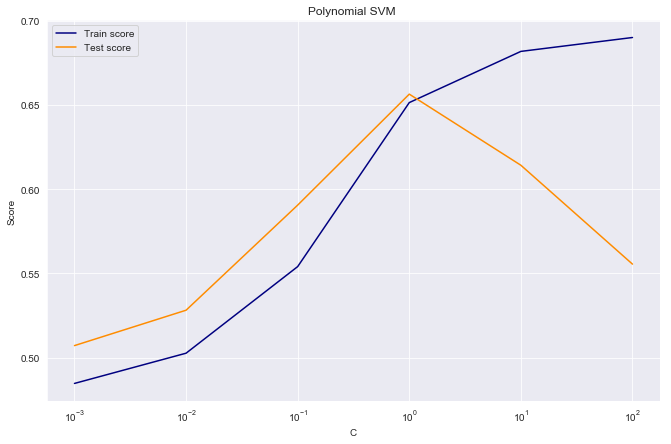

Best CV result: 0.6563441731932896
Best parameters: {'C': 1}
Training Score: 0.6547635252111674
Testing Score: 0.347370729955247


In [56]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
polySVMGridSV_train = polySVMGridSV.cv_results_["mean_train_score"]
polySVMGridSV_test = polySVMGridSV.cv_results_["mean_test_score"]

plt.figure(figsize = (11,7))
plt.title('Polynomial SVM ')
plt.xlabel('C')
plt.ylabel('Score')
plt.semilogx(C, polySVMGridSV_train, label='Train score',
             color='navy')
plt.semilogx(C, polySVMGridSV_test,
             label='Test score', color='darkorange')

plt.legend(loc='best')
plt.show()

printGridResult(polySVMGridSV)
model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'Polynomial SVM',
                    'Parameters' : polySVMGridSV.best_params_,
                    'Training_score': polySVMGridSV.score(X_train_pca, y_train_pca),
                    'Test Score': polySVMGridSV.score(X_test_pca, y_test_pca)})

In [57]:
modelResult = pd.DataFrame(model_Scores)
modelResult.set_index('Model Name', inplace = True)
modelResult

,Model Type,Parameters,Test Score,Training_score
Model Name,,,,
Linear Regression,Regression,-,1.000000e+00,1.000000e+00
SGD Regressor,Regression,"{'learning_rate': 'optimal', 'max_iter': 1000,...",-5.732903e+25,-4.066656e+26
Polynomial Regression PCA,Regression,{'Degree': 0},3.744168e-01,7.772667e-01
Ridge Regression,Regression,{'alpha': 100},3.806125e-01,8.454730e-01
Lasso Regression,Regression,{'alpha': 1},3.735311e-01,8.178981e-01
KNN Regressor,Regression,{'n_neighbors': 5},8.810583e-02,7.177136e-01
Linear SVM,Regression,{'C': 0.1},3.406080e-01,6.492269e-01
SVM Radial,Regression,"{'C': 100, 'gamma': 0.001}",6.687841e-02,9.638972e-01
Polynomial SVM,Regression,{'C': 1},3.473707e-01,6.547635e-01


In [58]:
## Reding results from Project 1 
oldresults = pd.read_csv('RegressionResults.csv')
oldresults

,Model Name,Model Type,Parameters,Test Score,Training_score
0,Linear Regression,Regression,-,4.865740e-01,7.754781e-01
1,SGD Regressor,Regression,"{'max_iter': 1000, 'random_state': 0, 'penalty...",-2.270000e+18,-8.070000e+19
2,Polynomial Regression,Regression,{'Degree': 2},9.987166e-01,9.579841e-01
3,Ridge Regression,Regression,{'alpha': 0.1},4.599559e-01,9.316140e-01
4,Lasso Regression,Regression,{'alpha': 0.001},4.536241e-01,9.250519e-01
5,KNN Regressor,Regression,{'n_neighbors': 1},1.347608e-01,1.000000e+00
6,Linear SVM,Regression,{'C': 100},4.380513e-01,8.564435e-01
7,SVM Radial,Regression,"{'C': 100, 'gamma': 0.01}",1.325977e-01,9.879893e-01
8,Polynomial SVM,Regression,{'C': 10},4.212567e-01,9.970480e-01


### Model Comparision

- The results from two different process is presented. 
- For the most of the models r2 score is reduced after applying PCA.
- As we have taken 13 principal components with 95% variance from the original data. 
- So the rest 5% loss causing the reduced accuracy of the models


In [59]:
import tensorflow as tf

In [60]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(10)

Using TensorFlow backend.


In [61]:
model = Sequential()
model.add(Dense(100, input_dim=31, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

Instructions for updating:
Colocations handled automatically by placer.


In [62]:
model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

In [63]:
model.fit(X_train, y_train, epochs = 1000, batch_size = 1000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
582/582 [==============================] - 0s 632us/step - loss: 314.5088 - mean_squared_error: 314.5088
Epoch 2/1000
582/582 [==============================] - 0s 7us/step - loss: 314.4302 - mean_squared_error: 314.4302
Epoch 3/1000
582/582 [==============================] - 0s 7us/step - loss: 314.3452 - mean_squared_error: 314.3452
Epoch 4/1000
582/582 [==============================] - 0s 7us/step - loss: 314.2440 - mean_squared_error: 314.2440
Epoch 5/1000
582/582 [==============================] - 0s 9us/step - loss: 314.1233 - mean_squared_error: 314.1233
Epoch 6/1000
582/582 [==============================] - 0s 7us/step - loss: 313.9803 - mean_squared_error: 313.9803
Epoch 7/1000
582/582 [==============================] - 0s 7us/step - loss: 313.8073 - mean_squared_error: 313.8073
Epoch 8/1000
582/582 [==============================] - 0s 9us/step - loss: 313.5971 - mean_squared_error: 313.5971
Epoch 9/1000
582/582 [

Epoch 70/1000
582/582 [==============================] - 0s 9us/step - loss: 56.9281 - mean_squared_error: 56.9281
Epoch 71/1000
582/582 [==============================] - 0s 10us/step - loss: 56.5198 - mean_squared_error: 56.5198
Epoch 72/1000
582/582 [==============================] - 0s 10us/step - loss: 55.8608 - mean_squared_error: 55.8608
Epoch 73/1000
582/582 [==============================] - 0s 12us/step - loss: 55.0213 - mean_squared_error: 55.0213
Epoch 74/1000
582/582 [==============================] - 0s 9us/step - loss: 54.1076 - mean_squared_error: 54.1076
Epoch 75/1000
582/582 [==============================] - 0s 9us/step - loss: 53.2501 - mean_squared_error: 53.2501
Epoch 76/1000
582/582 [==============================] - 0s 9us/step - loss: 52.5275 - mean_squared_error: 52.5275
Epoch 77/1000
582/582 [==============================] - 0s 10us/step - loss: 51.9757 - mean_squared_error: 51.9757
Epoch 78/1000
582/582 [==============================] - 0s 10us/step - loss

Epoch 141/1000
582/582 [==============================] - 0s 7us/step - loss: 27.5396 - mean_squared_error: 27.5396
Epoch 142/1000
582/582 [==============================] - 0s 7us/step - loss: 27.0985 - mean_squared_error: 27.0985
Epoch 143/1000
582/582 [==============================] - 0s 9us/step - loss: 26.6610 - mean_squared_error: 26.6610
Epoch 144/1000
582/582 [==============================] - 0s 9us/step - loss: 26.2202 - mean_squared_error: 26.2202
Epoch 145/1000
582/582 [==============================] - 0s 9us/step - loss: 25.7812 - mean_squared_error: 25.7812
Epoch 146/1000
582/582 [==============================] - 0s 7us/step - loss: 25.3443 - mean_squared_error: 25.3443
Epoch 147/1000
582/582 [==============================] - 0s 7us/step - loss: 24.9047 - mean_squared_error: 24.9047
Epoch 148/1000
582/582 [==============================] - 0s 7us/step - loss: 24.4632 - mean_squared_error: 24.4632
Epoch 149/1000
582/582 [==============================] - 0s 9us/step - 

Epoch 213/1000
582/582 [==============================] - 0s 7us/step - loss: 2.3832 - mean_squared_error: 2.3832
Epoch 214/1000
582/582 [==============================] - 0s 9us/step - loss: 2.2820 - mean_squared_error: 2.2820
Epoch 215/1000
582/582 [==============================] - 0s 9us/step - loss: 2.1897 - mean_squared_error: 2.1897
Epoch 216/1000
582/582 [==============================] - 0s 7us/step - loss: 2.1023 - mean_squared_error: 2.1023
Epoch 217/1000
582/582 [==============================] - 0s 9us/step - loss: 2.0203 - mean_squared_error: 2.0203
Epoch 218/1000
582/582 [==============================] - 0s 7us/step - loss: 1.9443 - mean_squared_error: 1.9443
Epoch 219/1000
582/582 [==============================] - 0s 9us/step - loss: 1.8729 - mean_squared_error: 1.8729
Epoch 220/1000
582/582 [==============================] - 0s 9us/step - loss: 1.8059 - mean_squared_error: 1.8059
Epoch 221/1000
582/582 [==============================] - 0s 7us/step - loss: 1.7440 - m

Epoch 285/1000
582/582 [==============================] - 0s 10us/step - loss: 0.4523 - mean_squared_error: 0.4523
Epoch 286/1000
582/582 [==============================] - 0s 7us/step - loss: 0.4455 - mean_squared_error: 0.4455
Epoch 287/1000
582/582 [==============================] - 0s 9us/step - loss: 0.4385 - mean_squared_error: 0.4385
Epoch 288/1000
582/582 [==============================] - 0s 10us/step - loss: 0.4306 - mean_squared_error: 0.4306
Epoch 289/1000
582/582 [==============================] - 0s 9us/step - loss: 0.4228 - mean_squared_error: 0.4228
Epoch 290/1000
582/582 [==============================] - 0s 9us/step - loss: 0.4149 - mean_squared_error: 0.4149
Epoch 291/1000
582/582 [==============================] - 0s 9us/step - loss: 0.4077 - mean_squared_error: 0.4077
Epoch 292/1000
582/582 [==============================] - 0s 9us/step - loss: 0.4002 - mean_squared_error: 0.4002
Epoch 293/1000
582/582 [==============================] - 0s 9us/step - loss: 0.3931 -

Epoch 357/1000
582/582 [==============================] - 0s 9us/step - loss: 0.1674 - mean_squared_error: 0.1674
Epoch 358/1000
582/582 [==============================] - 0s 9us/step - loss: 0.1658 - mean_squared_error: 0.1658
Epoch 359/1000
582/582 [==============================] - 0s 7us/step - loss: 0.1639 - mean_squared_error: 0.1639
Epoch 360/1000
582/582 [==============================] - 0s 10us/step - loss: 0.1625 - mean_squared_error: 0.1625
Epoch 361/1000
582/582 [==============================] - 0s 9us/step - loss: 0.1608 - mean_squared_error: 0.1608
Epoch 362/1000
582/582 [==============================] - 0s 9us/step - loss: 0.1593 - mean_squared_error: 0.1593
Epoch 363/1000
582/582 [==============================] - 0s 9us/step - loss: 0.1577 - mean_squared_error: 0.1577
Epoch 364/1000
582/582 [==============================] - 0s 9us/step - loss: 0.1564 - mean_squared_error: 0.1564
Epoch 365/1000
582/582 [==============================] - 0s 10us/step - loss: 0.1548 -

Epoch 429/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0897 - mean_squared_error: 0.0897
Epoch 430/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0889 - mean_squared_error: 0.0889
Epoch 431/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0882 - mean_squared_error: 0.0882
Epoch 432/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0874 - mean_squared_error: 0.0874
Epoch 433/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0867 - mean_squared_error: 0.0867
Epoch 434/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0860 - mean_squared_error: 0.0860
Epoch 435/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 436/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0846 - mean_squared_error: 0.0846
Epoch 437/1000
582/582 [==============================] - 0s 10us/step - loss: 0.0839 - 

Epoch 501/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 502/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0531 - mean_squared_error: 0.0531
Epoch 503/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0529 - mean_squared_error: 0.0529
Epoch 504/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0525 - mean_squared_error: 0.0525
Epoch 505/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0522 - mean_squared_error: 0.0522
Epoch 506/1000
582/582 [==============================] - 0s 12us/step - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 507/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0516 - mean_squared_error: 0.0516
Epoch 508/1000
582/582 [==============================] - 0s 12us/step - loss: 0.0513 - mean_squared_error: 0.0513
Epoch 509/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0510 -

Epoch 573/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 574/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 575/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 576/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 577/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 578/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 579/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 580/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 581/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0348 - m

Epoch 645/1000
582/582 [==============================] - 0s 5us/step - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 646/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 647/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 648/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 649/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 650/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 651/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 652/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 653/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0243 - m

Epoch 717/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 718/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 719/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 720/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 721/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 722/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 723/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 724/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 725/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0171 - m

Epoch 789/1000
582/582 [==============================] - 0s 12us/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 790/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 791/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 792/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 793/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 794/1000
582/582 [==============================] - 0s 10us/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 795/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 796/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 797/1000
582/582 [==============================] - 0s 10us/step - loss: 0.0120 

Epoch 861/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 862/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 863/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 864/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 865/1000
582/582 [==============================] - 0s 7us/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 866/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 867/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 868/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 869/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0088 - m

Epoch 933/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 934/1000
582/582 [==============================] - 0s 12us/step - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 935/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 936/1000
582/582 [==============================] - 0s 10us/step - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 937/1000
582/582 [==============================] - 0s 12us/step - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 938/1000
582/582 [==============================] - 0s 9us/step - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 939/1000
582/582 [==============================] - 0s 12us/step - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 940/1000
582/582 [==============================] - 0s 14us/step - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 941/1000
582/582 [==============================] - 0s 17us/step - loss: 0.00

In [64]:
model.evaluate(X_test, y_test)

194/194 [==============================] - 0s 262us/step


[2411.20724727198, 2411.20724727198]

In [65]:
from sklearn.metrics import r2_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: 1.00
Test score: 0.53
